In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("undersampled_data.csv")
df

,User,Card,Year,Month,Day,Amount,UseChip,MerchantName,MerchantCity,MerchantCountry,Zip,MCC,target
0,1750.0,0.0,2015.0,7.0,16.0,$21.42,Swipe Transaction,Lukass Theaters,Tiffin,USA,44883.000000,7832.0,No
1,1959.0,1.0,2016.0,5.0,5.0,$76.99,Chip Transaction,Jadens Wholesale,Lancaster,USA,93535.000000,5300.0,No
2,182.0,2.0,2012.0,11.0,23.0,$2.19,Swipe Transaction,Supermarket Chain 3,Houston,USA,77096.000000,5411.0,No
3,458.0,2.0,2019.0,5.0,15.0,$45.73,Chip Transaction,Supermarket Chain 3,Flint,USA,48532.000000,5411.0,No
4,1949.0,0.0,2018.0,1.0,4.0,$1.25,Chip Transaction,Convenience Store Chain 1,Brooklyn,USA,11213.000000,5499.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739,1998.0,2.0,2013.0,1.0,26.0,$193.24,Swipe Transaction,Neufelder Tegucigalpa Wine and Liquor,Tegucigalpa,Honduras,51694.676895,5921.0,Yes
1740,1999.0,3.0,2020.0,1.0,26.0,$221.96,Swipe Transaction,Abrils Wholesale,Saint Louis,USA,63146.000000,5300.0,Yes
1741,1999.0,3.0,2020.0,1.0,26.0,$26.69,Swipe Transaction,Abrils Wholesale,Saint Louis,USA,63146.000000,5300.0,Yes
1742,1999.0,3.0,2020.0,1.0,26.0,$103.95,Chip Transaction,Cox Saint Louis Restaurant,Saint Louis,USA,63146.000000,5812.0,Yes


In [3]:
unique_country = df['User'].unique()

print("Unique country Names:")
print(unique_country)


Unique country Names:
[1750. 1959.  182.  458. 1949.  899.  168.  282. 1167.  362.  591. 1113.
  732. 1075. 1216.   95.   56.  141. 1135. 1195. 1129.  220. 1933. 1664.
 1752.  475.   70. 1567.  693.  816.  920. 1804.  706. 1744. 1450.  740.
   47.  358.  323.  401. 1333.  175.  545.  101.   38. 1202.  913.  180.
   35.  839. 1304.  261.  575. 1696.  813.  435.  197.   24.  385.  389.
 1682. 1594.  611. 1458.  705.  648.  574.  974.  244. 1335.  300.  508.
 1474. 1006. 1278.   37.  478. 1138.  751.  956. 1913. 1079. 1547. 1491.
  433. 1196. 1876.  531. 1287.  772. 1247.  864. 1385. 1183.  124.  188.
 1739.   82.  150.  143.  255. 1603. 1783. 1931. 1638.  885. 1610.  132.
 1980. 1721.  311. 1666. 1150.  617.  370.  718. 1325. 1358.  111. 1895.
 1579.  662.  630. 1961.  374.  961. 1078. 1763. 1487.  387.  336. 1574.
 1765. 1930.  291. 1382.   21. 1439. 1520. 1611.  292.  440. 1233.  126.
 1746.  279. 1861. 1643. 1633. 1517. 1502.  327. 1046. 1616. 1874. 1925.
 1628. 1395. 1307.  927. 1475

In [4]:
df['Amount'] = df['Amount'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [5]:
df["target"].value_counts()

target
No     872
Yes    872
Name: count, dtype: int64

In [6]:
df.isnull().sum()

User               0
Card               0
Year               0
Month              0
Day                0
Amount             0
UseChip            0
MerchantName       0
MerchantCity       0
MerchantCountry    0
Zip                0
MCC                0
target             0
dtype: int64

In [7]:
import pandas as pd

# Create a cross-tabulation table
cross_tab = pd.crosstab(df['UseChip'], df['target'])

print("Cross-tabulation Table:")
print(cross_tab)


Cross-tabulation Table:
target               No  Yes
UseChip                     
Chip Transaction    236  184
Online Transaction   96  260
Swipe Transaction   540  428


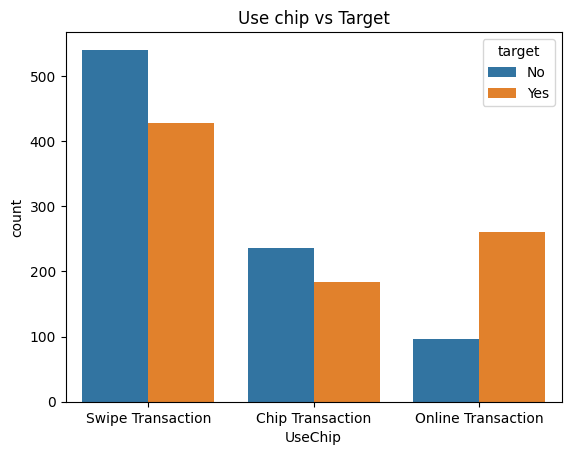

In [8]:
sns.countplot(x='UseChip', hue='target', data=df)
plt.title("Use chip vs Target")
plt.show()

In [9]:
df['FraudStatus'] = df['target'].apply(lambda x: 'Fraud' if x == 'Yes' else 'Not Fraud')


In [10]:
grouped_data = df.groupby(['Year', 'UseChip', 'FraudStatus']).size().reset_index(name='Count')


In [11]:
pivot_data = grouped_data.pivot_table(index='Year', columns=['UseChip', 'FraudStatus'], values='Count', fill_value=0)


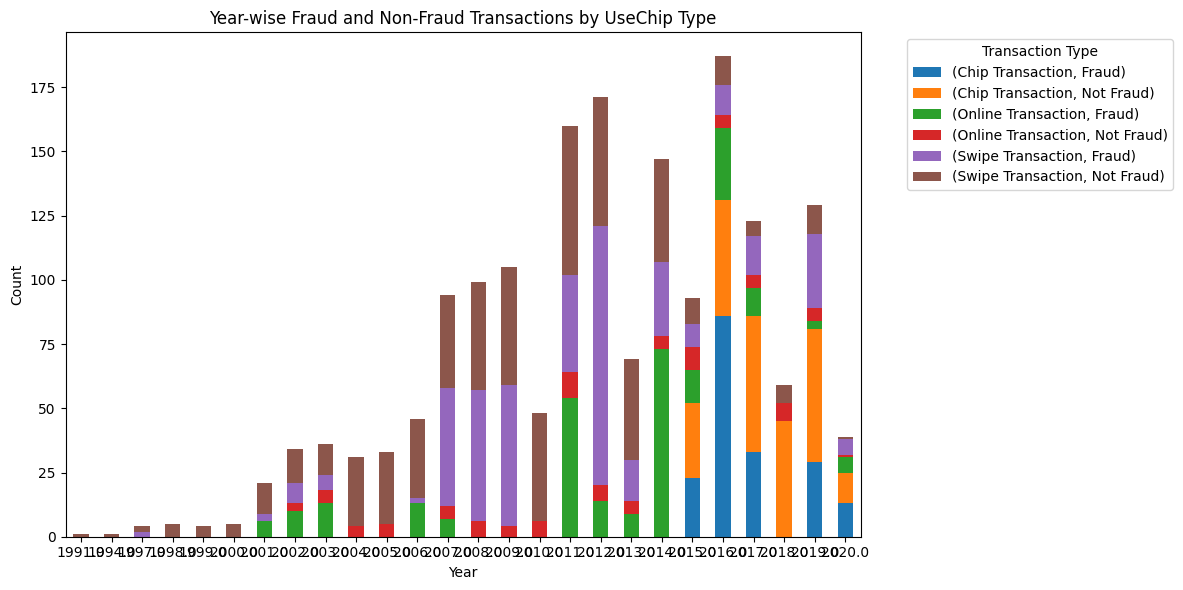

In [12]:
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year-wise Fraud and Non-Fraud Transactions by UseChip Type')

# Show the plot
plt.legend(title='Transaction Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

# Display the plot
plt.tight_layout()
plt.show()


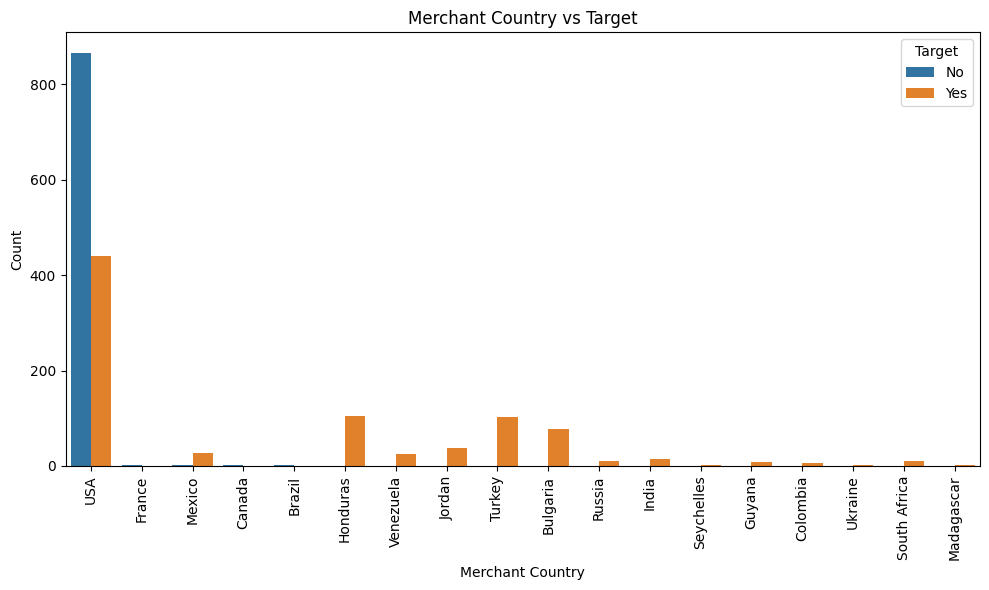

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MerchantCountry', hue='target', data=df)
plt.title("Merchant Country vs Target")
plt.xlabel("Merchant Country")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title='Target', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


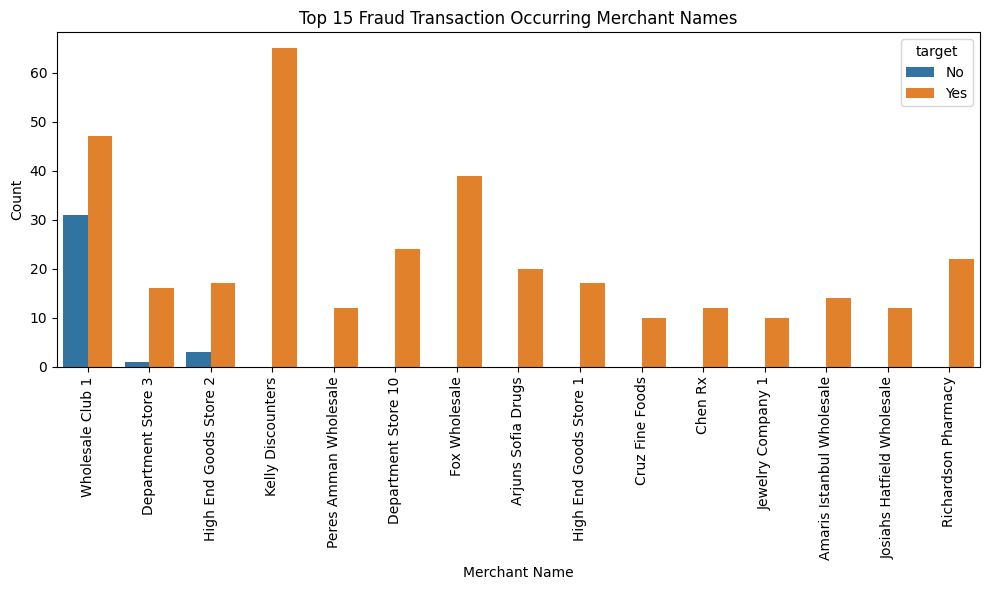

In [14]:
fraud_df = df[df['target'] == 'Yes']

# Get the top 10 fraud transaction-occurring merchant names
top_10_fraud_merchants = fraud_df['MerchantName'].value_counts().head(15).index.tolist()

# Filter the original DataFrame to include only the top 10 fraud merchants
df_top_10_fraud = df[df['MerchantName'].isin(top_10_fraud_merchants)]

plt.figure(figsize=(10, 6))
sns.countplot(x='MerchantName', hue='target', data=df_top_10_fraud)
plt.title("Top 15 Fraud Transaction Occurring Merchant Names")
plt.xlabel("Merchant Name")
plt.ylabel("Count")
plt.xticks(rotation=90)
#plt.legend(title='Target', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()
